<a href="https://colab.research.google.com/github/sRajdeep617/Face-Mask-Detection-Using-CNN/blob/main/Face_Mask_Recognition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install opencv-python

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf 
import cv2

In [4]:
annotations_directory = '/content/drive/MyDrive/Projects/Face Mask Recognition/annotations'
images_directory = '/content/drive/MyDrive/Projects/Face Mask Recognition/images'

In [5]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}

In [6]:
import glob
from xml.etree import ElementTree

In [7]:
for annotation in glob.glob(annotations_directory + '/*.xml'):
  tree = ElementTree.parse(annotation)

  for element in tree.iter():
    if 'size' in element.tag:
      for attribute in list(element):
        if 'width' in attribute.tag:
          width = int(round(float(attribute.text)))

        if 'height' in attribute.tag:
          height = int(round(float(attribute.text)))

    if 'object' in element.tag:
      for attribute in list(element):

        if 'name' in attribute.tag:
          name = attribute.text
          information['label'] += [name]
          information['width'] += [width]
          information['height'] += [height]
          information['file'] += [annotation.split('/')[-1][0: -4]]

        if 'bndbox' in attribute.tag:
          for dimension in list(attribute):
            if 'xmin' in dimension.tag:
              xmin = int(round(float(dimension.text)))
              information['xmin'] += [xmin]

            if 'ymin' in dimension.tag:
              ymin = int(round(float(dimension.text)))
              information['ymin'] += [ymin]

            if 'xmax' in dimension.tag:
              xmax = int(round(float(dimension.text)))
              information['xmax'] += [xmax]

            if 'ymax' in dimension.tag:
              ymax = int(round(float(dimension.text)))
              information['ymax'] += [ymax]

In [8]:
df = pd.DataFrame.from_dict(information, orient='index')
df = df.transpose()

In [9]:
df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,321,34,354,69,with_mask,maksssksksss1,400,156
1,224,38,261,73,with_mask,maksssksksss1,400,156
2,299,58,315,81,with_mask,maksssksksss1,400,156
3,143,74,174,115,with_mask,maksssksksss1,400,156
4,74,69,95,99,with_mask,maksssksksss1,400,156
5,191,67,221,93,with_mask,maksssksksss1,400,156
6,21,73,44,93,with_mask,maksssksksss1,400,156
7,369,70,398,99,with_mask,maksssksksss1,400,156
8,83,56,111,89,without_mask,maksssksksss1,400,156
9,98,267,194,383,with_mask,maksssksksss10,301,400


# Feature Engineering

In [10]:
# add annotation and image file names
df['annotation_file'] = df['file'] + '.xml'
df['image_file'] = df['file'] + '.png'

# tidy grammatival issues
df.loc[df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'

**Check if label is right**

image maksssksksss1.png is labeled with several categories, we can simply check the actual image to see if the labels are right

In [11]:
# function to shpw actual image
def render_image(image):
  plt.figure(figsize = (12, 8))
  plt.imshow(image)
  plt.show()

# function to cnvert BGR to RGB
def convert_to_RGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
'''df['image_file'].iloc[0]'''

"df['image_file'].iloc[0]"

In [13]:
'''img_1_path = '/content/drive/MyDrive/Projects/Face Mask Recognition/images/' + df['image_file'].iloc[0]
img_1_path'''

"img_1_path = '/content/drive/MyDrive/Projects/Face Mask Recognition/images/' + df['image_file'].iloc[0]\nimg_1_path"

In [14]:
# reading image using its path
'''img_1 = cv2.imread(img_1_path)
img_1'''

'img_1 = cv2.imread(img_1_path)\nimg_1'

The image is in NumPy array form, to view the actual image, we simply use the render_image() function that we've defined earlier and convert it to RGB.

In [15]:
# display the image
'''render_image(convert_to_RGB(img_1))'''

'render_image(convert_to_RGB(img_1))'

# **Crop Images**
Since there are multiple labels in an image (caused by more than 1 person in an image), we need to crop the image into several images that only consist of 1 person. We can use one of the images (ex: img_1) as our sample to make sure that we can crop images in a correct way.

We need xmin, ymin, xmax, and ymax values so that we can crop the image within the bounding box.

In [16]:
'''x = df['xmin'].iloc[0]
y = df['ymin'].iloc[0]
width = df['xmax'].iloc[0]
height = df['ymax'].iloc[0]

cropped_1 = img_1[y: height, x: width]
render_image(cropped_1)'''

"x = df['xmin'].iloc[0]\ny = df['ymin'].iloc[0]\nwidth = df['xmax'].iloc[0]\nheight = df['ymax'].iloc[0]\n\ncropped_1 = img_1[y: height, x: width]\nrender_image(cropped_1)"

In this example, I converted the rightmost person in image_1. Now displaying the image in RGB form

In [17]:
'''render_image(convert_to_RGB(cropped_1))'''

'render_image(convert_to_RGB(cropped_1))'

Need to apply this to all images in the dataframe.

In [18]:
len(df)

4072

So, there will be around 4072 cropped images so the **multiple label in an image** problem is solved.

Creating a new directory for cropped images


In [28]:
import os

directory = 'Cropped_Images_Final'
parent_directory = '/content/drive/MyDrive/Projects/Face Mask Recognition'

path = os.path.join(parent_directory, directory)
os.mkdir(path)

Adding Cropped images to new directory

In [29]:
df['cropped_image_file'] = df['file']
df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
1,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
2,299,58,315,81,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
3,143,74,174,115,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1
4,74,69,95,99,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1


After creating the directory for cropped images, it's time for running a for loop to crop all images

In [30]:
for i in range(len(df)):

  # get the file path and read the image
  img_filepath = '/content/drive/MyDrive/Projects/Face Mask Recognition/images/' + df['image_file'].iloc[i]
  img = cv2.imread(img_filepath)

  # setting the cropped image file name
  df['cropped_image_file'].iloc[i] = df['cropped_image_file'].iloc[i] + '-' + str(i) + '.png'
  cropped_image_filename = df['cropped_image_file'].iloc[i]

  xmin = df['xmin'].iloc[i]
  ymin = df['ymin'].iloc[i]
  xmax = df['xmax'].iloc[i]
  ymax = df['ymax'].iloc[i]

  cropped_image = img[ymin: ymax, xmin: xmax]

  # saving the cropped image
  cropped_image_directory = os.path.join('/content/drive/MyDrive/Projects/Face Mask Recognition/Cropped_Images_Final/', cropped_image_filename)
  cv2.imwrite(cropped_image_directory, cropped_image)

In [60]:
df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,321,34,354,69,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-0.png
1,224,38,261,73,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-1.png
2,299,58,315,81,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-2.png
3,143,74,174,115,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-3.png
4,74,69,95,99,with_mask,maksssksksss1,400,156,maksssksksss1.xml,maksssksksss1.png,maksssksksss1-4.png


Taking the image in the zeroth index, and displaying the cropped image.

In [32]:
img_1_cropped_path = '/content/drive/MyDrive/Projects/Face Mask Recognition/Cropped_Images_Final/' + df['cropped_image_file'].iloc[0]
img_1_cropped_path

'/content/drive/MyDrive/Projects/Face Mask Recognition/Cropped_Images_Final/maksssksksss1-0.png'

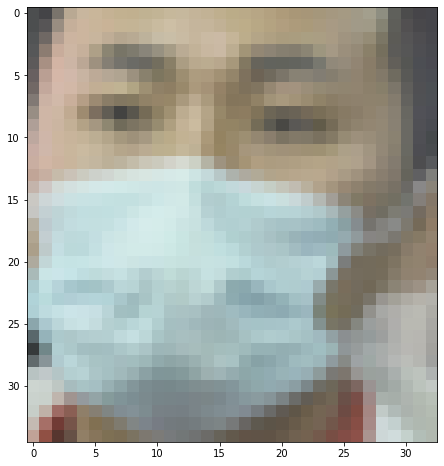

In [33]:
img_1_cropped = cv2.imread(img_1_cropped_path)
render_image(convert_to_RGB(img_1_cropped))

# Train-Test Split


Before proceeding into next steps, splitting the data into training and testing data in the ratio 3 : 1

In [61]:
test_df = df[:800]
train_df = df[800:]

train_df.shape, test_df.shape

((3272, 11), (800, 11))

In [35]:
classes = list(train_df['label'].unique())
classes

['with_mask', 'without_mask', 'mask_incorrectly_worn']

In [62]:
# count occurences of labels
train_df['label'].value_counts()

with_mask                2658
without_mask              515
mask_incorrectly_worn      99
Name: label, dtype: int64

In [37]:
sorted_label_df = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

,label,count
0,with_mask,2658
1,without_mask,515
2,mask_incorrectly_worn,99


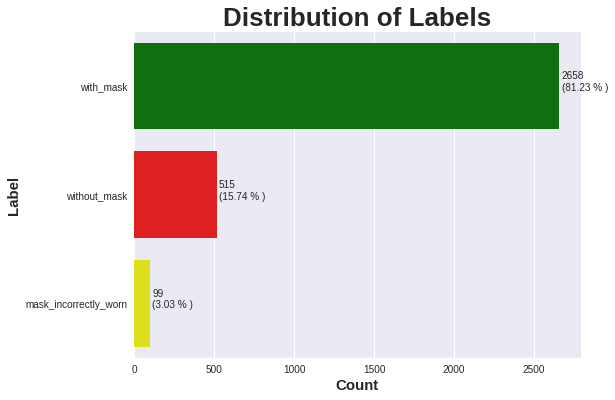

In [38]:
# visualising label counts
plt.style.use('seaborn')
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'count', y = 'label', data = sorted_label_df, orient = 'horizontal', palette = ['green', 'red', 'yellow'])

plt.title('Distribution of Labels', fontsize = 26, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
  width = p.get_width()
  percentage = round(width * 100 / sum(sorted_label_df['count']), 2)
  plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} % )')

plt.show();

In [39]:
cropped_image_path = '/content/drive/MyDrive/Projects/Face Mask Recognition/cropped_images_final/' + train_df['cropped_image_file'].iloc[0]
cropped_image = cv2.imread(cropped_image_path)
cropped_image.shape

(31, 23, 3)

Visualising distribution of width and height of image

In [41]:
image_width, image_height = [], []
for i in range(len(train_df)):
  cropped_image_path = '/content/drive/MyDrive/Projects/Face Mask Recognition/Cropped_Images_Final/' + train_df['cropped_image_file'].iloc[i]
  cropped_image = cv2.imread(cropped_image_path)

  image_width.append(cropped_image.shape[0])
  image_height.append(cropped_image.shape[1])

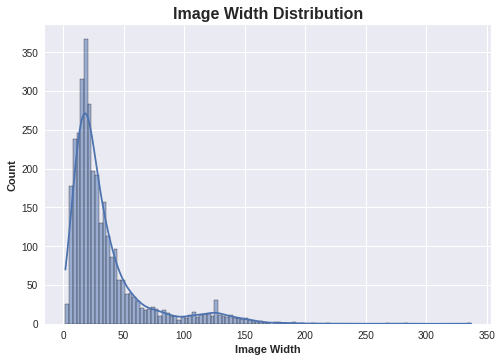

In [42]:
# Image Width Distribution
sns.histplot(image_width, kde = True)
plt.title('Image Width Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Width', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show();

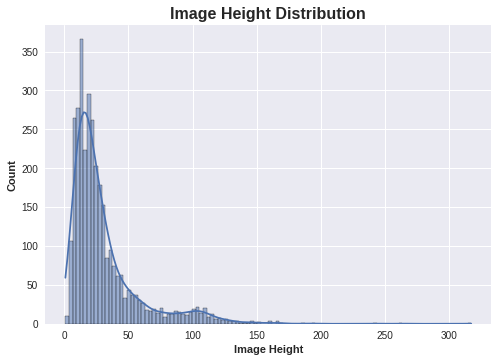

In [43]:
# Image Height Distribution
sns.histplot(image_height, kde = True)
plt.title('Image Height Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Height', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show();

In [44]:
print('IMAGE WIDTH')
print(f'Min: {min(image_width)}')
print(f'Max: {max(image_width)}')
print(f'Mean: {np.mean(image_width)}')
print(f'Median: {np.median(image_width)}')

print('IMAGE HEIGHT')
print(f'Min: {min(image_height)}')
print(f'Max: {max(image_height)}')
print(f'Mean: {np.mean(image_height)}')
print(f'Median: {np.median(image_height)}')

IMAGE WIDTH
Min: 2
Max: 337
Mean: 34.56020782396088
Median: 23.0
IMAGE HEIGHT
Min: 1
Max: 317
Mean: 30.71271393643032
Median: 22.0


In [45]:
image_target_size = (int(np.median(image_width)), int(np.median(image_height)))
image_target_size

(23, 22)

In [63]:
valid_df = train_df[:800]
train_df = train_df[800:]

print(len(valid_df), len(train_df))

800 2472


Image Data Generator

In [64]:
from keras_preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.20)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe = train_df,
    directory = '/content/drive/MyDrive/Projects/Face Mask Recognition/Cropped_Images_Final',
    x_col = 'cropped_image_file',
    y_col = 'label',
    sunset = 'training',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 2472 validated image filenames belonging to 3 classes.


In [65]:
valid_generator = train_image_generator.flow_from_dataframe(
    dataframe = valid_df,
    directory = '/content/drive/MyDrive/Projects/Face Mask Recognition/Cropped_Images_Final',
    x_col = 'cropped_image_file',
    y_col = 'label',
    sunset = 'validation',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 800 validated image filenames belonging to 3 classes.


In [66]:
test_generator = train_image_generator.flow_from_dataframe(
    dataframe = test_df,
    directory = '/content/drive/MyDrive/Projects/Face Mask Recognition/Cropped_Images_Final',
    x_col = 'cropped_image_file',
    y_col = 'label',
    sunset = 'validation',
    batch_size = 32,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = image_target_size
)

Found 800 validated image filenames belonging to 3 classes.


# Modelling

In [67]:
input_shape = [int(np.median(image_width)), int(np.median(image_height)), 3]

In [75]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
                                tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = input_shape),
                                tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
                                tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
                                tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
                                tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
                                tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [77]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy', keras.metrics.Recall()])

history = model.fit(train_generator, epochs = 10, steps_per_epoch = len(train_generator),
                    validation_data = valid_generator,
                    validation_steps = len(valid_generator))

Epoch 1/10
78/78 [==============================] - 20s 103ms/step - loss: 0.5833 - accuracy: 0.8103 - recall_1: 0.7549 - val_loss: 0.4890 - val_accuracy: 0.8188 - val_recall_1: 0.8138
Epoch 2/10
78/78 [==============================] - 8s 103ms/step - loss: 0.4285 - accuracy: 0.8256 - recall_1: 0.7977 - val_loss: 0.3092 - val_accuracy: 0.9000 - val_recall_1: 0.8687
Epoch 3/10
78/78 [==============================] - 8s 100ms/step - loss: 0.3107 - accuracy: 0.8977 - recall_1: 0.8847 - val_loss: 0.2982 - val_accuracy: 0.9038 - val_recall_1: 0.8925
Epoch 4/10
78/78 [==============================] - 8s 98ms/step - loss: 0.2571 - accuracy: 0.9159 - recall_1: 0.9074 - val_loss: 0.2374 - val_accuracy: 0.9262 - val_recall_1: 0.9212
Epoch 5/10
78/78 [==============================] - 8s 101ms/step - loss: 0.2274 - accuracy: 0.9292 - recall_1: 0.9239 - val_loss: 0.3289 - val_accuracy: 0.9013 - val_recall_1: 0.8988
Epoch 6/10
78/78 [==============================] - 8s 98ms/step - loss: 0.2151 

In [78]:
result = pd.DataFrame(history.history)
result

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1
0,0.583324,0.810275,0.754854,0.488998,0.81875,0.81375
1,0.428507,0.825647,0.797735,0.309166,0.90000,0.86875
2,0.310714,0.897654,0.884709,0.298168,0.90375,0.89250
3,0.257098,0.915858,0.907362,0.237375,0.92625,0.92125
4,0.227367,0.929207,0.923948,0.328855,0.90125,0.89875
5,0.215071,0.932848,0.923544,0.224188,0.92625,0.92250
6,0.195553,0.935680,0.930825,0.225742,0.92500,0.92125
7,0.188619,0.934466,0.930421,0.215840,0.92875,0.92500
8,0.180960,0.941748,0.934871,0.210618,0.92750,0.92500
9,0.173084,0.944984,0.940534,0.220922,0.92625,0.92375


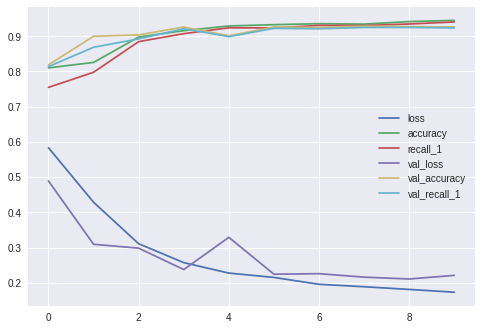

In [79]:
result.plot();

In [95]:
def plot_line(result, ax, col, title, train_column, valid_column):
  ax[col].plot(result[train_column])
  ax[col].plot(result[valid_column])

  ax[col].set_title(title, fontweight = 'bold')
  ax[col].legend(['Train', 'Validation'])

def plot_result(result, train_recall, valid_recall):
  fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 8))
  fig.suptitle('Model Performance', fontsize = 20, fontweight = 'bold')

  plot_line(result, ax, 0, 'Accuarcy', 'accuracy', 'val_accuracy')
  plot_line(result, ax, 1, 'Recall', train_recall, valid_recall)
  plot_line(result, ax, 2, 'Loss', 'loss', 'val_loss')

  plt.show();

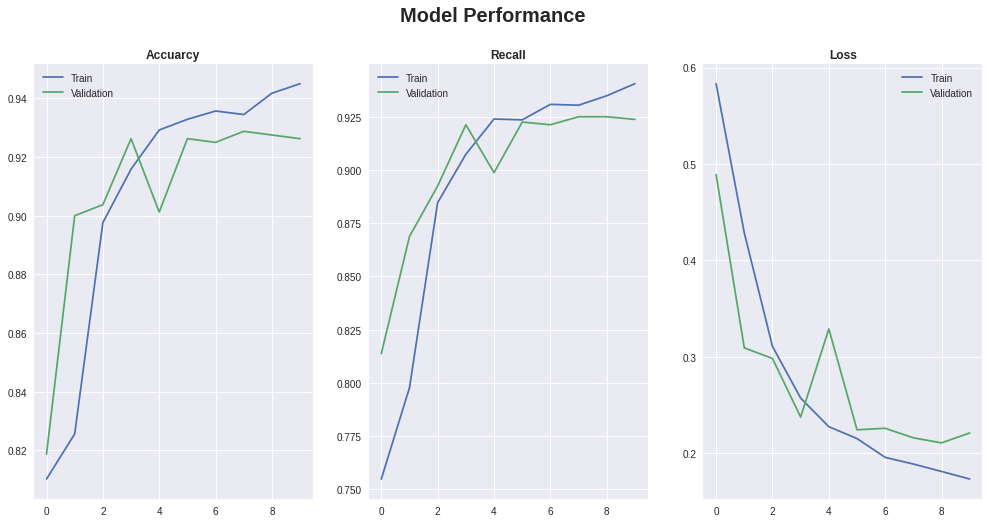

In [96]:
plot_result(result, 'recall_1', 'val_recall_1')

# Adding Early Stopping

In [84]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = input_shape),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units = len(classes), activation = 'softmax')
])

In [89]:
from keras.callbacks import  EarlyStopping,ReduceLROnPlateau
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy', keras.metrics.Recall()])

callback_list = [
                 EarlyStopping(monitor = 'accuracy', patience = 2),
                 ReduceLROnPlateau(monitor = 'loss', factor = 0.1, patience = 1)
]

history_2 = model_2.fit(train_generator, epochs = 100, steps_per_epoch = len(train_generator), 
                        validation_data = valid_generator, validation_steps = len(valid_generator),
                        callbacks = callback_list)

Epoch 1/100
78/78 [==============================] - 9s 101ms/step - loss: 0.2549 - accuracy: 0.9207 - recall_3: 0.9106 - val_loss: 0.2704 - val_accuracy: 0.9162 - val_recall_3: 0.9137 - lr: 0.0010
Epoch 2/100
78/78 [==============================] - 8s 96ms/step - loss: 0.2324 - accuracy: 0.9231 - recall_3: 0.9175 - val_loss: 0.2795 - val_accuracy: 0.9150 - val_recall_3: 0.9150 - lr: 0.0010
Epoch 3/100
78/78 [==============================] - 7s 95ms/step - loss: 0.2080 - accuracy: 0.9328 - recall_3: 0.9248 - val_loss: 0.2797 - val_accuracy: 0.9175 - val_recall_3: 0.9112 - lr: 0.0010
Epoch 4/100
78/78 [==============================] - 7s 94ms/step - loss: 0.1917 - accuracy: 0.9385 - recall_3: 0.9320 - val_loss: 0.2559 - val_accuracy: 0.9237 - val_recall_3: 0.9237 - lr: 0.0010
Epoch 5/100
78/78 [==============================] - 7s 95ms/step - loss: 0.1899 - accuracy: 0.9401 - recall_3: 0.9320 - val_loss: 0.2715 - val_accuracy: 0.9175 - val_recall_3: 0.9150 - lr: 0.0010
Epoch 6/100
78

In [92]:
result_2 = pd.DataFrame(history_2.history)
result_2

,loss,accuracy,recall_3,val_loss,val_accuracy,val_recall_3,lr
0,0.254903,0.920712,0.910599,0.270390,0.91625,0.91375,0.001
1,0.232410,0.923139,0.917476,0.279536,0.91500,0.91500,0.001
2,0.207974,0.932848,0.924757,0.279684,0.91750,0.91125,0.001
3,0.191715,0.938511,0.932039,0.255909,0.92375,0.92375,0.001
4,0.189893,0.940129,0.932039,0.271502,0.91750,0.91500,0.001
5,0.182227,0.936489,0.932039,0.237503,0.92500,0.92375,0.001
6,0.168012,0.942961,0.941748,0.290196,0.92000,0.91750,0.001
7,0.163876,0.945793,0.942961,0.223151,0.92625,0.92250,0.001
8,0.159925,0.944579,0.940129,0.239208,0.92250,0.91625,0.001
9,0.159150,0.945388,0.939320,0.218470,0.92750,0.92500,0.001


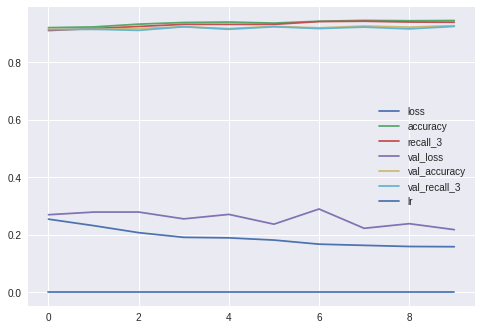

In [93]:
result_2.plot()

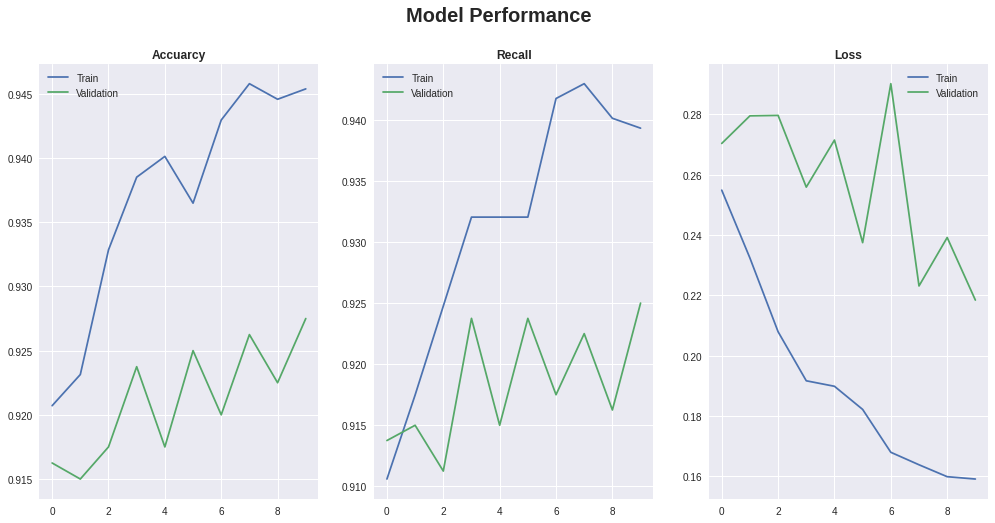

In [97]:
plot_result(result_2, 'recall_3', 'val_recall_3')